In [1]:
import pandas as pd
import numpy as np
import os
import gc
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import *
# 核心模型使用第三方库
from catboost import CatBoostClassifier
from sklearn.linear_model import SGDRegressor, LinearRegression, Ridge
import lightgbm as lgb
# 交叉验证所使用的第三方库
from sklearn.model_selection import StratifiedKFold, KFold
# 评估指标所使用的的第三方库
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, log_loss
# 忽略报警所使用的第三方库
import warnings
warnings.filterwarnings('ignore')


D:\Download\Anaconda\neirong\lib\site-packages\dask\dataframe\utils.py:15: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_row', 1000)

In [3]:
data_1 = pd.read_csv("t1.csv")
data_2 = pd.read_csv("t2.csv")
data_3 = pd.read_csv("t3.csv")

In [160]:
data_t = data_1[:]

In [92]:
data_t['kgd'] =0

In [93]:
data_t

,文物编号,纹饰,类型,颜色,表面风化,kd
0,1,C,高钾,蓝绿,无风化,0
1,2,A,铅钡,浅蓝,风化,0
2,3,A,高钾,蓝绿,无风化,0
3,4,A,高钾,蓝绿,无风化,0
4,5,A,高钾,蓝绿,无风化,0
5,6,A,高钾,蓝绿,无风化,0
6,7,B,高钾,蓝绿,风化,0
7,8,C,铅钡,紫,风化,0
8,9,B,高钾,蓝绿,风化,0
9,10,B,高钾,蓝绿,风化,0


In [161]:
data_t['纹饰'].unique()#C:0 A:1 B:2

array(['C', 'A', 'B'], dtype=object)

In [162]:
data_t['类型'].unique()#'高钾':0, '铅钡':1

array(['高钾', '铅钡'], dtype=object)

In [163]:
data_t['颜色'].unique()#'蓝绿':0, '浅蓝':1, '紫':2, '深绿':3, '深蓝':4, nan, '浅绿':6, '黑':7, '绿':8

array(['蓝绿', '浅蓝', '紫', '深绿', '深蓝', nan, '浅绿', '黑', '绿'], dtype=object)

In [164]:
data_t['纹饰_类型']=data_t['纹饰']+'_'+data_t['类型']
data_t['纹饰_颜色']=data_t['纹饰']+'_'+data_t['颜色']
data_t['类型_颜色']=data_t['类型']+'_'+data_t['颜色']

In [166]:
data_t['纹饰_类型'].unique()
data_t['纹饰_颜色'].unique()
data_t['类型_颜色'].unique()

array(['高钾_蓝绿', '铅钡_浅蓝', '铅钡_紫', '高钾_浅蓝', '高钾_深绿', '高钾_深蓝', nan, '铅钡_蓝绿',
       '铅钡_深蓝', '铅钡_浅绿', '铅钡_深绿', '铅钡_黑', '铅钡_绿'], dtype=object)

In [167]:
def label_encoder(series):
    ls = list(series.unique())
    length = len(ls)
    cat_dict = dict(zip(ls, range(length)))
    return series.map(cat_dict)

In [169]:
cols = [col for col in data_t.columns if col != '文物编号']
for i in tqdm(cols):
    data_t[i] = label_encoder(data_t[i])

100%|██████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 1000.97it/s]


In [170]:
data_t = pd.get_dummies(data_t, columns=['纹饰','表面风化','类型', '颜色','纹饰_类型', '纹饰_颜色', '纹饰_颜色','类型_颜色'])

In [180]:
# del data_t['文物编号']
del data_t['纹饰_颜色_类型']

In [179]:
data_t

,纹饰_颜色_类型,纹饰_0,纹饰_1,纹饰_2,表面风化_0,表面风化_1,类型_0,类型_1,颜色_0,颜色_1,颜色_2,颜色_3,颜色_4,颜色_5,颜色_6,颜色_7,颜色_8,纹饰_类型_0,纹饰_类型_1,纹饰_类型_2,纹饰_类型_3,纹饰_类型_4,纹饰_颜色_0,纹饰_颜色_1,纹饰_颜色_2,纹饰_颜色_3,纹饰_颜色_4,纹饰_颜色_5,纹饰_颜色_6,纹饰_颜色_7,纹饰_颜色_8,纹饰_颜色_9,纹饰_颜色_10,纹饰_颜色_11,纹饰_颜色_0,纹饰_颜色_1,纹饰_颜色_2,纹饰_颜色_3,纹饰_颜色_4,纹饰_颜色_5,纹饰_颜色_6,纹饰_颜色_7,纹饰_颜色_8,纹饰_颜色_9,纹饰_颜色_10,纹饰_颜色_11,类型_颜色_0,类型_颜色_1,类型_颜色_2,类型_颜色_3,类型_颜色_4,类型_颜色_5,类型_颜色_6,类型_颜色_7,类型_颜色_8,类型_颜色_9,类型_颜色_10,类型_颜色_11,类型_颜色_12
0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,2,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,2,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5,2,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
6,3,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
7,4,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
8,3,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
9,3,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [181]:
from mlxtend.frequent_patterns import apriori

apriori(data_t, min_support=0.2, use_colnames=True)

,support,itemsets
0,0.517241,(纹饰_0)
1,0.379310,(纹饰_1)
2,0.413793,(表面风化_0)
3,0.586207,(表面风化_1)
4,0.310345,(类型_0)
5,0.689655,(类型_1)
6,0.258621,(颜色_0)
7,0.344828,(颜色_1)
8,0.275862,(纹饰_类型_1)
9,0.413793,(纹饰_类型_4)


In [35]:
cols = [col for col in data_1.columns if col not in ['文物编号', '表面风化']]

In [78]:
x_train = data_1[cols]
y_train = data_1['表面风化']

In [79]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
model1 = SelectKBest(chi2, k=6)#选择k个最佳特征
model1.fit_transform(x_train, y_train)

array([[ 0,  0,  0,  0,  0,  0],
       [ 1,  1,  1,  1,  1,  1],
       [ 1,  0,  0,  2,  2,  0],
       [ 1,  0,  0,  2,  2,  0],
       [ 1,  0,  0,  2,  2,  0],
       [ 1,  0,  0,  2,  2,  0],
       [ 2,  0,  0,  3,  3,  0],
       [ 0,  1,  2,  4,  4,  2],
       [ 2,  0,  0,  3,  3,  0],
       [ 2,  0,  0,  3,  3,  0],
       [ 0,  1,  1,  4,  5,  1],
       [ 2,  0,  0,  3,  3,  0],
       [ 0,  0,  1,  0,  5,  3],
       [ 0,  0,  3,  0,  6,  4],
       [ 0,  0,  1,  0,  5,  3],
       [ 0,  0,  1,  0,  5,  3],
       [ 0,  0,  1,  0,  5,  3],
       [ 1,  0,  4,  2,  7,  5],
       [ 1,  1,  5,  1,  8,  6],
       [ 1,  1,  1,  1,  1,  1],
       [ 1,  0,  0,  2,  2,  0],
       [ 2,  0,  0,  3,  3,  0],
       [ 1,  1,  0,  1,  2,  7],
       [ 0,  1,  2,  4,  4,  2],
       [ 0,  1,  1,  4,  5,  1],
       [ 0,  1,  2,  4,  4,  2],
       [ 2,  0,  0,  3,  3,  0],
       [ 1,  1,  1,  1,  1,  1],
       [ 1,  1,  1,  1,  1,  1],
       [ 1,  1,  4,  1,  7,  8],
       [ 0

In [58]:
model1.scores_

array([1.14201269, 2.13529412, 0.01210826, 5.49575394, 0.0266301 ,
       0.24677679])

In [59]:
model1.pvalues_

array([0.28522744, 0.14394285, 0.9123796 , 0.01906271, 0.87037096,
       0.61935384])

In [90]:
import matplotlib.pyplot as plt  
plt.rcParams['font.sans-serif'] = [u'SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [100]:
cols

['纹饰', '类型', '颜色', '纹饰_类型', '纹饰_颜色', '类型_颜色']

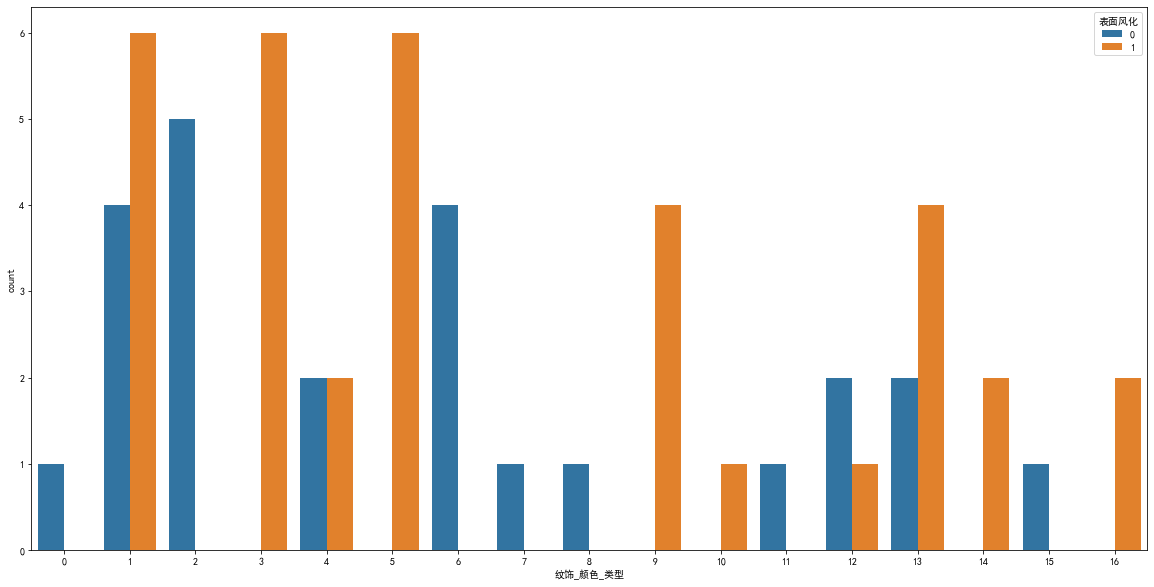

In [118]:
col = '纹饰_颜色_类型'
plt.figure(figsize=(20, 10))
sns.countplot(x=col,hue ='表面风化' ,data=data_1)
plt.savefig("D:/浏览器/数模/C题/附件/{}_风化_count.png".format(col))

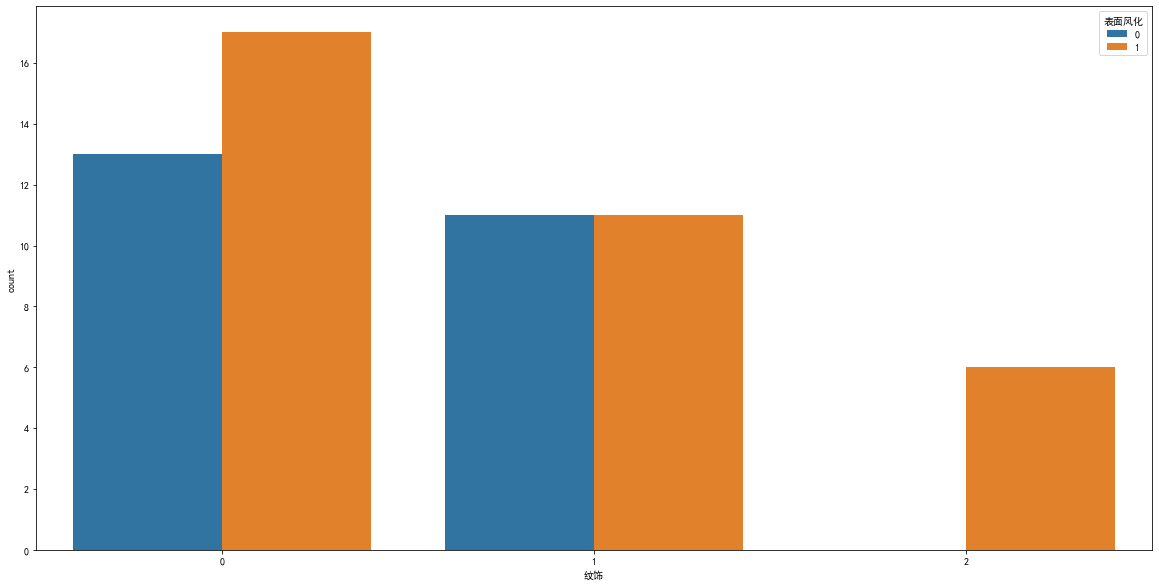

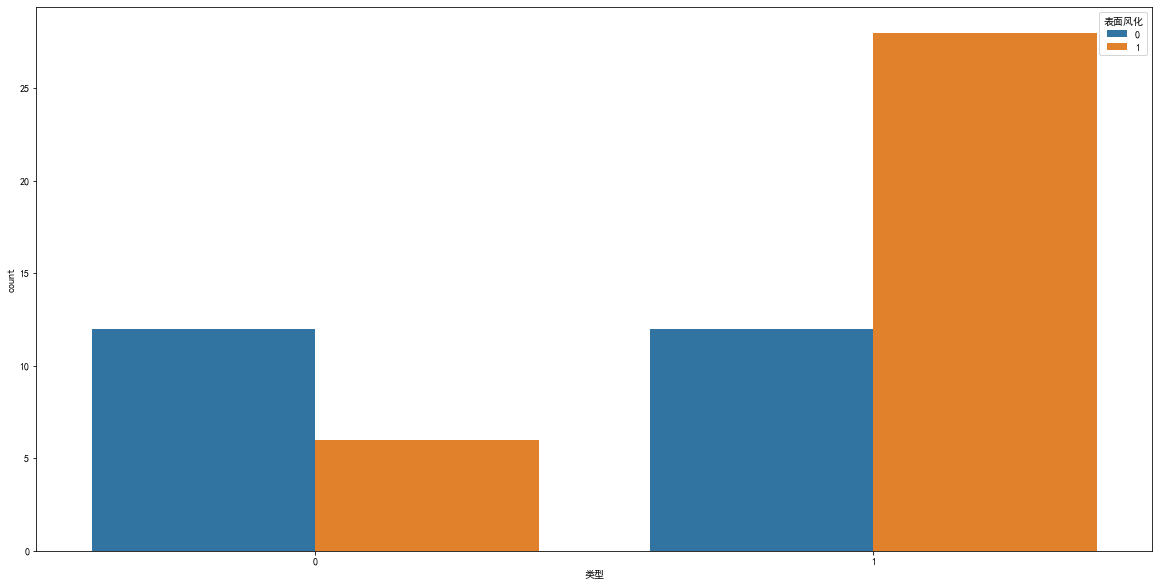

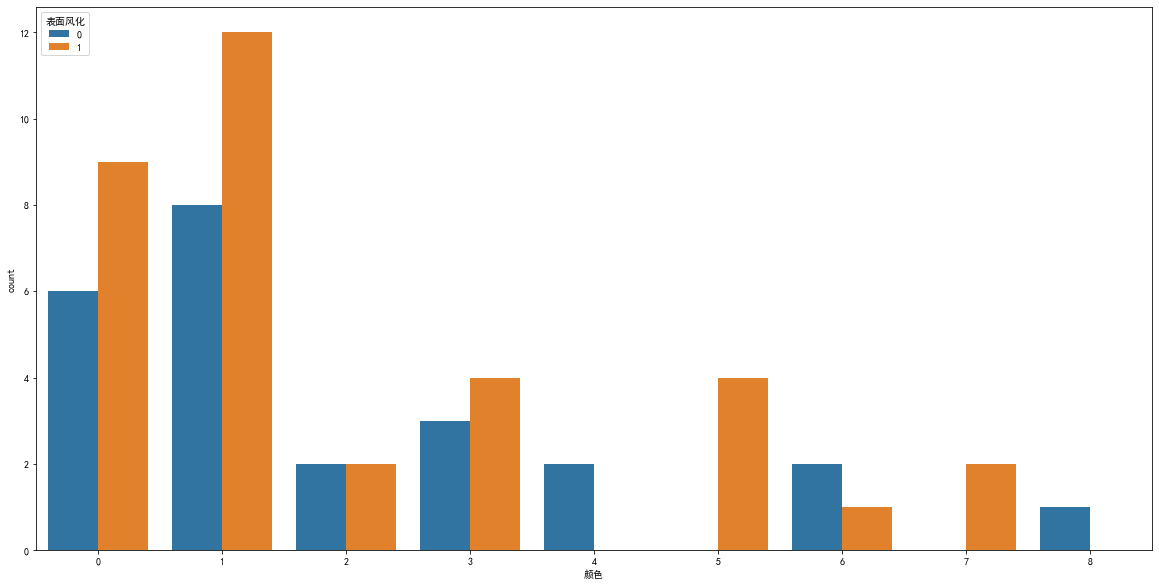

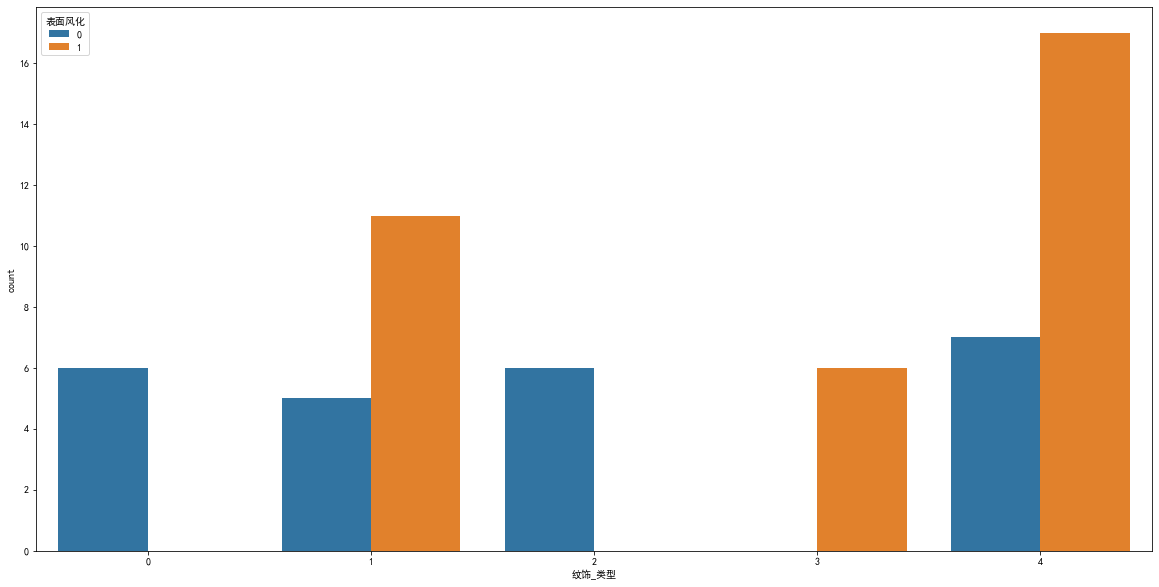

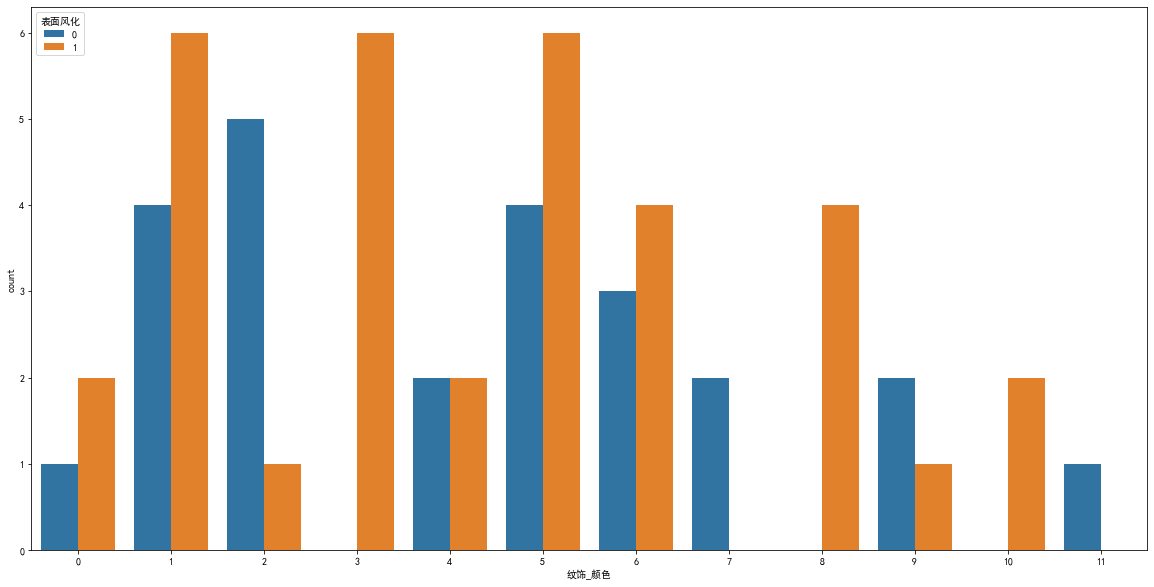

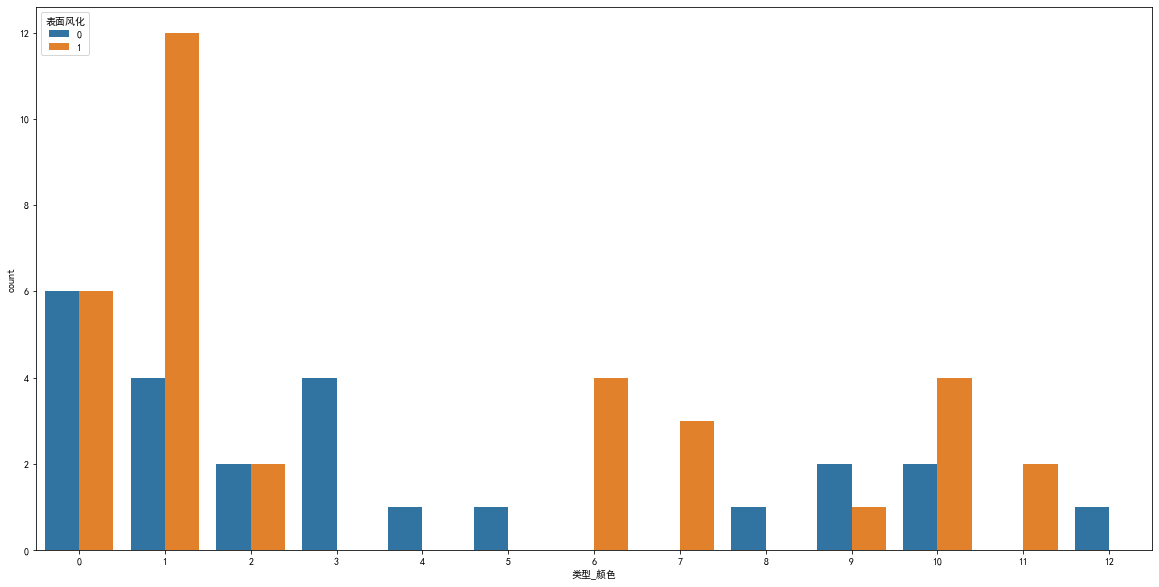

In [99]:
for col in cols:
    plt.figure(figsize=(20, 10))
    sns.countplot(x=col,hue ='表面风化' ,data=data_1)
    plt.savefig("D:/浏览器/数模/C题/附件/{}_风化_count.png".format(col))

In [ ]:
for col in cols:
    plt.figure(figsize=(20, 10))
    sns.barplot(x = data_t[col], y = data_t['表面风化'] )
    plt.legend((u'', u’2等舱’,u’3等舱’,))
    plt.savefig("D:/浏览器/数模/C题/附件/{}_风化.png".format(col))

In [13]:
data_2['文物采样点'] = data_2['文物采样点'].astype(str)

In [22]:
def get_dig(str):
    return str[:2]

In [24]:
#data_2【17】【19】
data_2['文物编号'] = data_2['文物采样点'].apply(get_dig)

In [34]:
data_2['文物编号'] = data_2['文物编号'].astype(int)

In [35]:
data_2 = pd.merge(data_2,data_1[['文物编号', '表面风化']], how='left', on='文物编号')

In [38]:
data_2 = data_2.fillna(0)

In [51]:
data_2.drop(labels=[17, 19], axis=0, inplace = True)#删除17， 19

In [57]:
data_2 = pd.merge(data_2,data_1[['文物编号', '类型']], how='left', on='文物编号')

In [142]:
for row in data_2.index:
    if '未风化点' in data_2.loc[row,'文物采样点']:
        data_2.loc[row,'表面风化']=0
    elif '严重风化点' in data_2.loc[row,'文物采样点']:
        data_2.loc[row,'表面风化']=1

In [143]:
data_2

,文物采样点,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2),文物编号,表面风化,类型
0,01,69.33,0.00,9.99,6.32,0.87,3.93,1.74,3.87,0.00,0.00,1.17,0.00,0.0,0.39,1,0,0
1,02,36.28,0.00,1.05,2.34,1.18,5.73,1.86,0.26,47.43,0.00,3.57,0.19,0.0,0.00,2,1,1
2,03部位1,87.05,0.00,5.19,2.01,0.00,4.06,0.00,0.78,0.25,0.00,0.66,0.00,0.0,0.00,3,0,0
3,03部位2,61.71,0.00,12.37,5.87,1.11,5.50,2.16,5.09,1.41,2.86,0.70,0.10,0.0,0.00,3,0,0
4,04,65.88,0.00,9.67,7.12,1.56,6.44,2.06,2.18,0.00,0.00,0.79,0.00,0.0,0.36,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,54严重风化点,17.11,0.00,0.00,0.00,1.11,3.65,0.00,1.34,58.46,0.00,14.13,1.12,0.0,0.00,54,1,1
63,55,49.01,2.71,0.00,1.13,0.00,1.45,0.00,0.86,32.92,7.95,0.35,0.00,0.0,0.00,55,0,1
64,56,29.15,0.00,0.00,1.21,0.00,1.85,0.00,0.79,41.25,15.45,2.54,0.00,0.0,0.00,56,1,1
65,57,25.42,0.00,0.00,1.31,0.00,2.18,0.00,1.16,45.10,17.30,0.00,0.00,0.0,0.00,57,1,1


In [145]:
data_2_type0 = data_2[data_2['类型']==0]
data_2_type1 = data_2[data_2['类型']==1]

In [178]:
chem_cols = [col for col in data_2.columns if col not in ['文物采样点', '文物编号', '表面风化', '类型']]

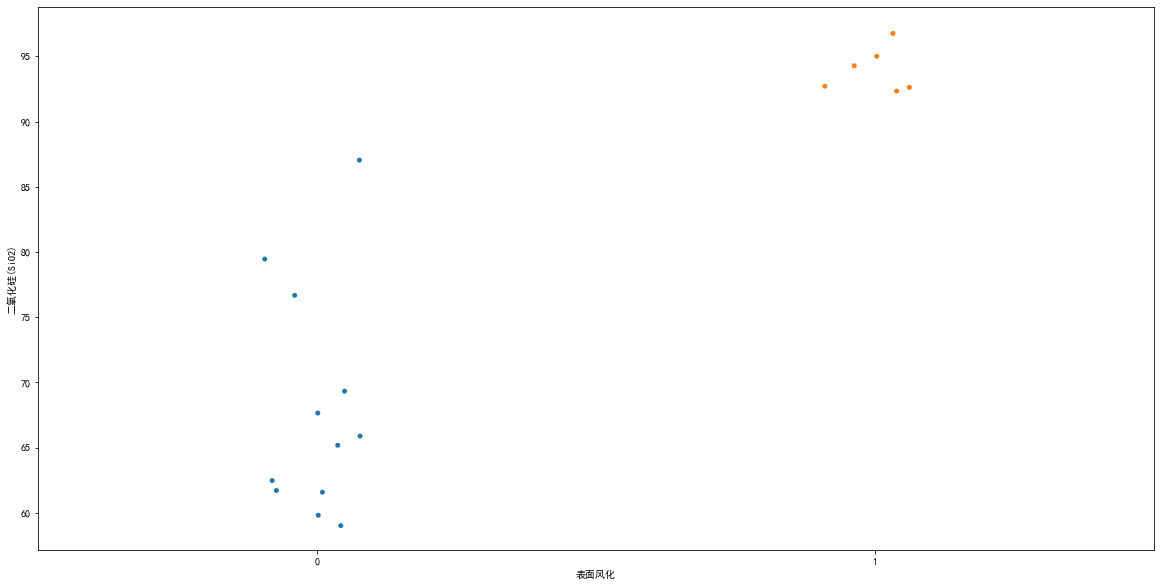

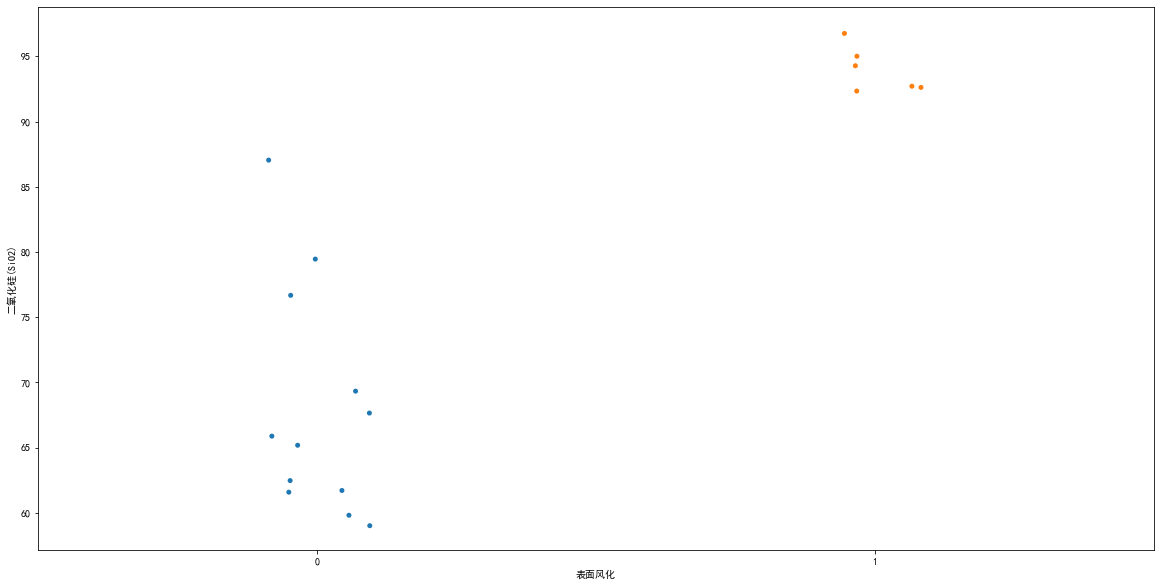

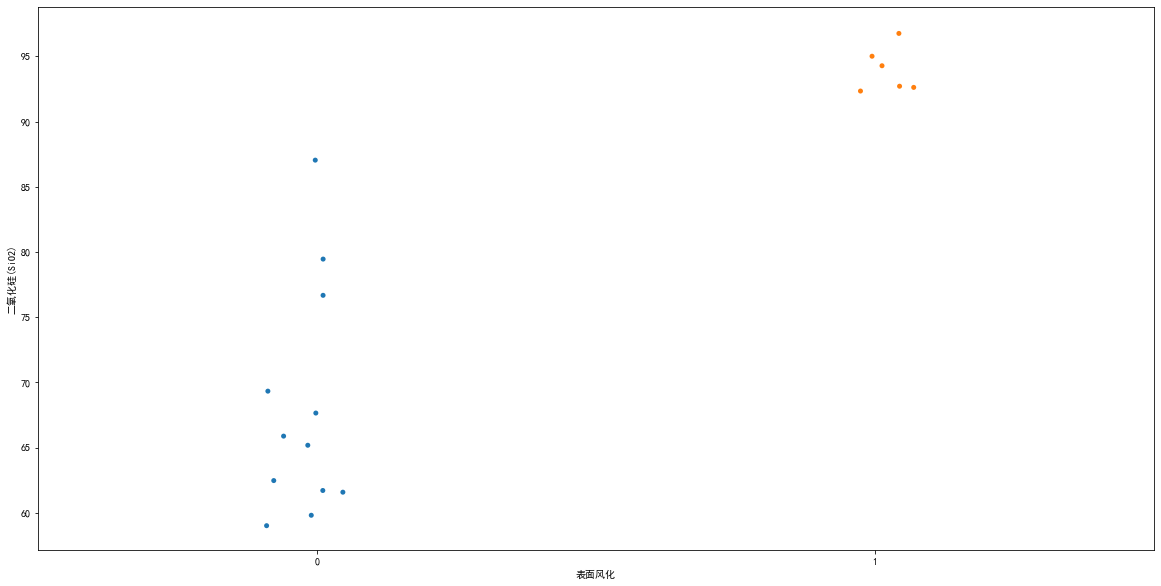

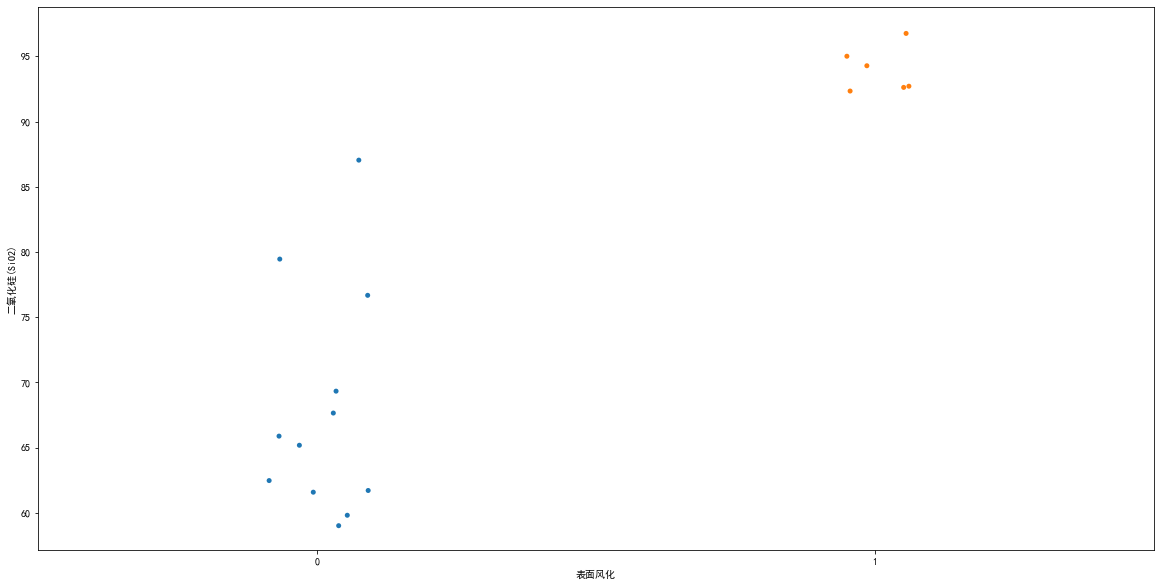

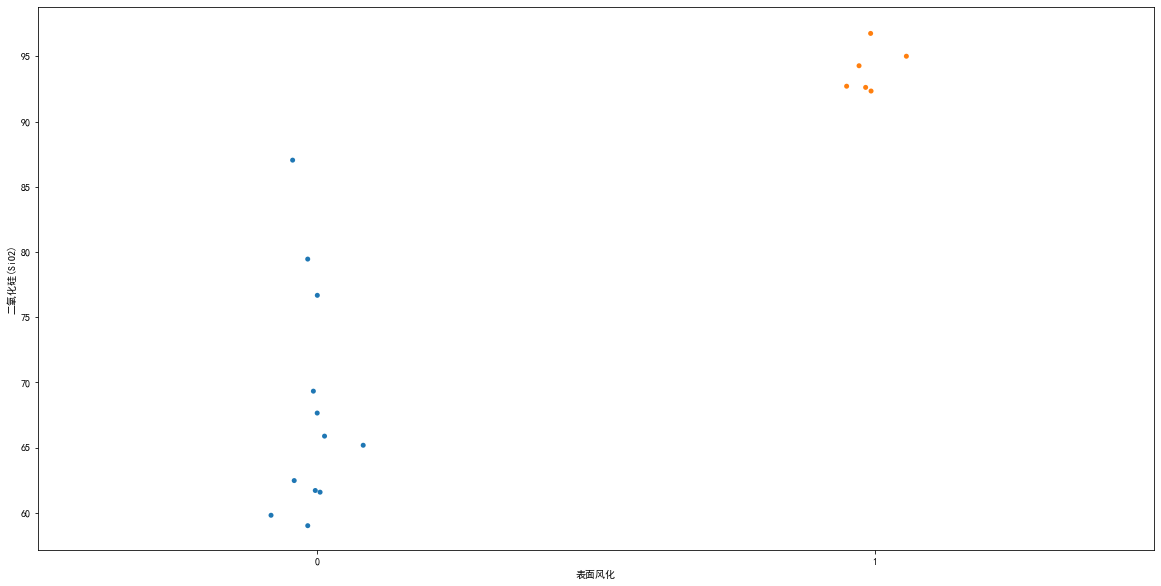

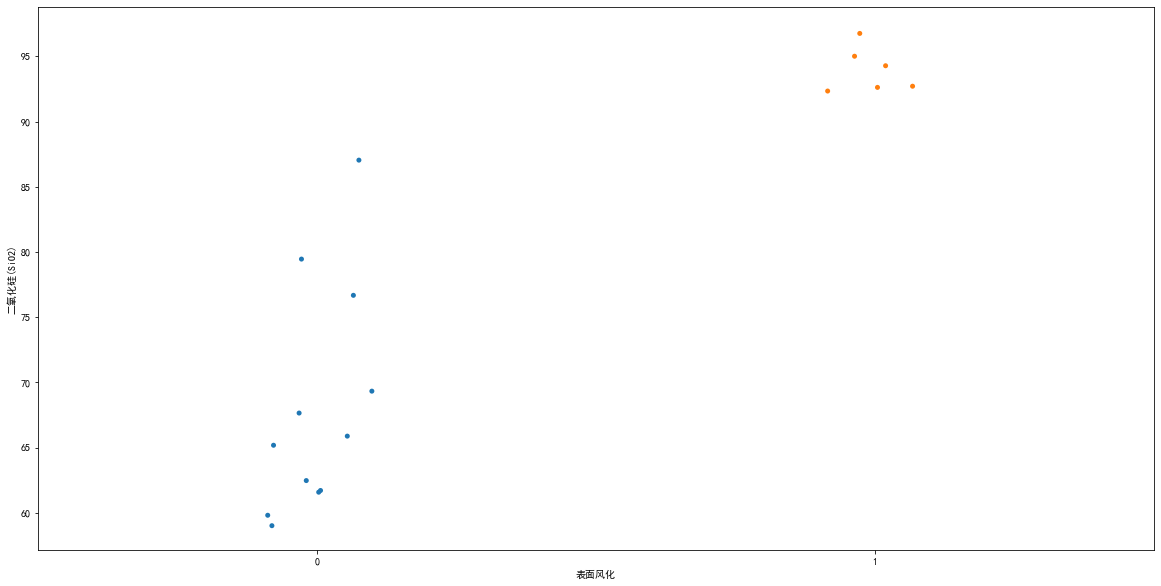

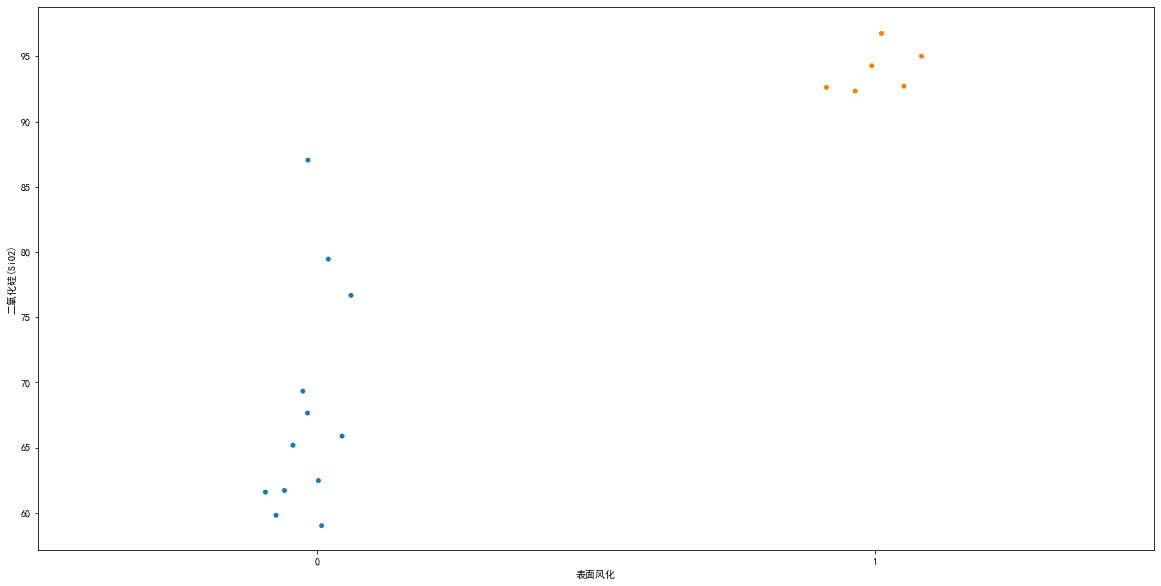

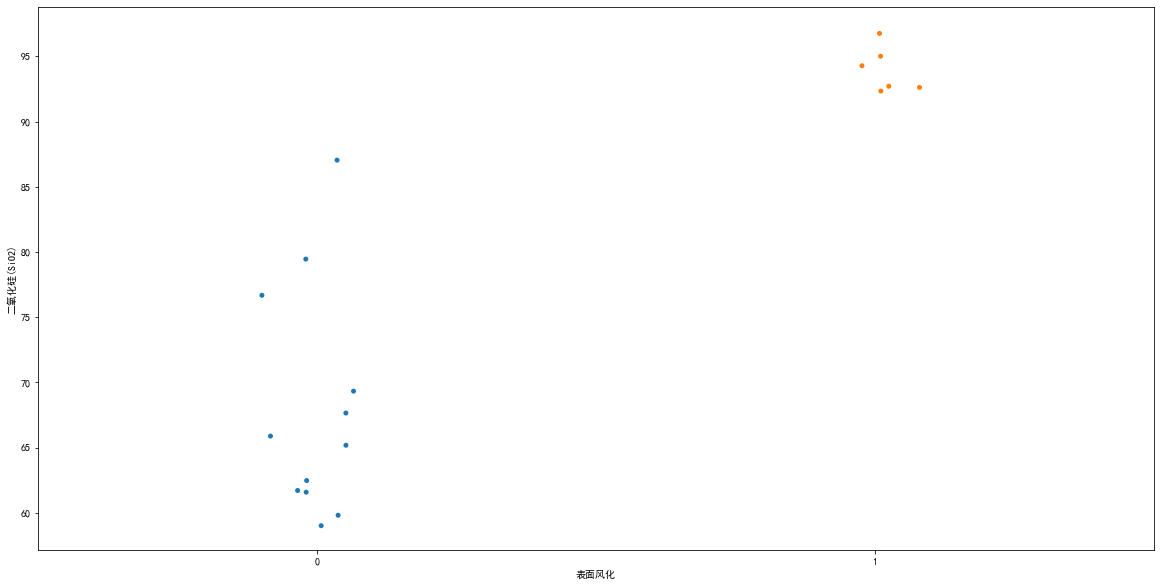

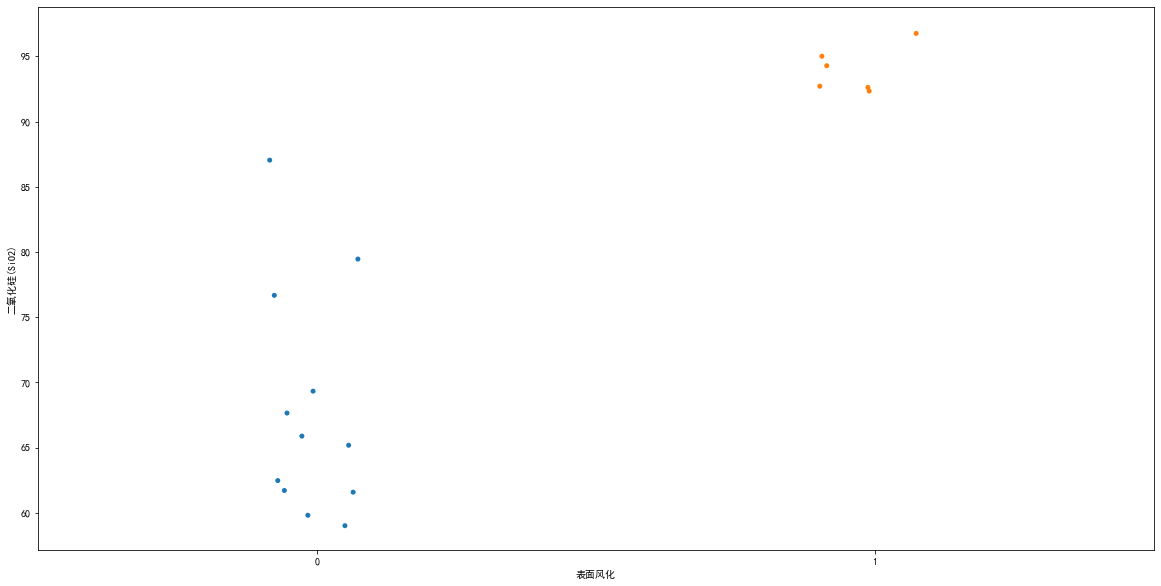

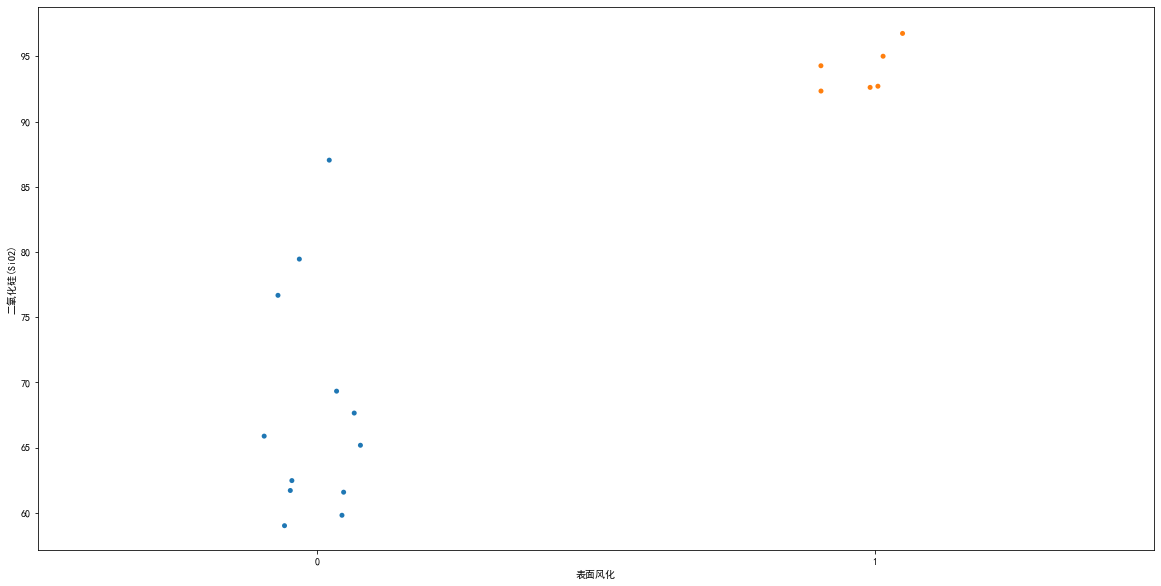

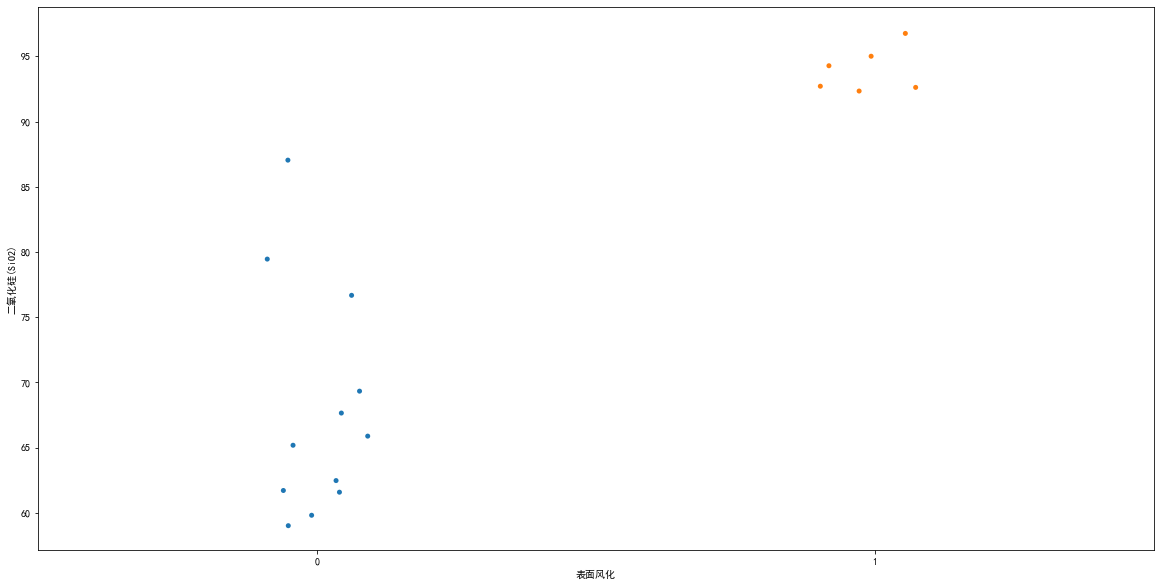

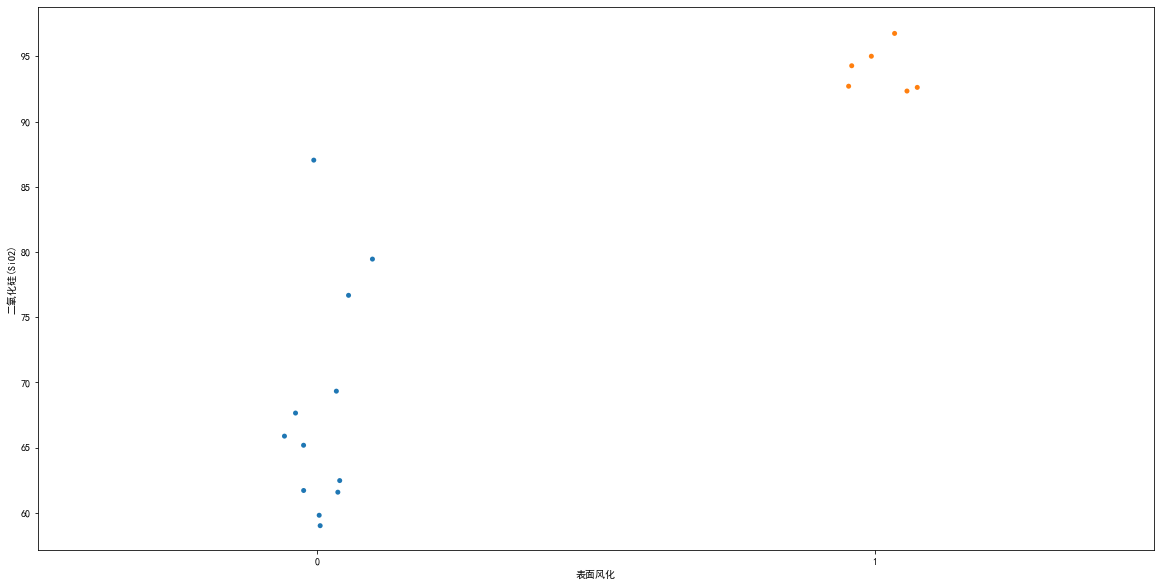

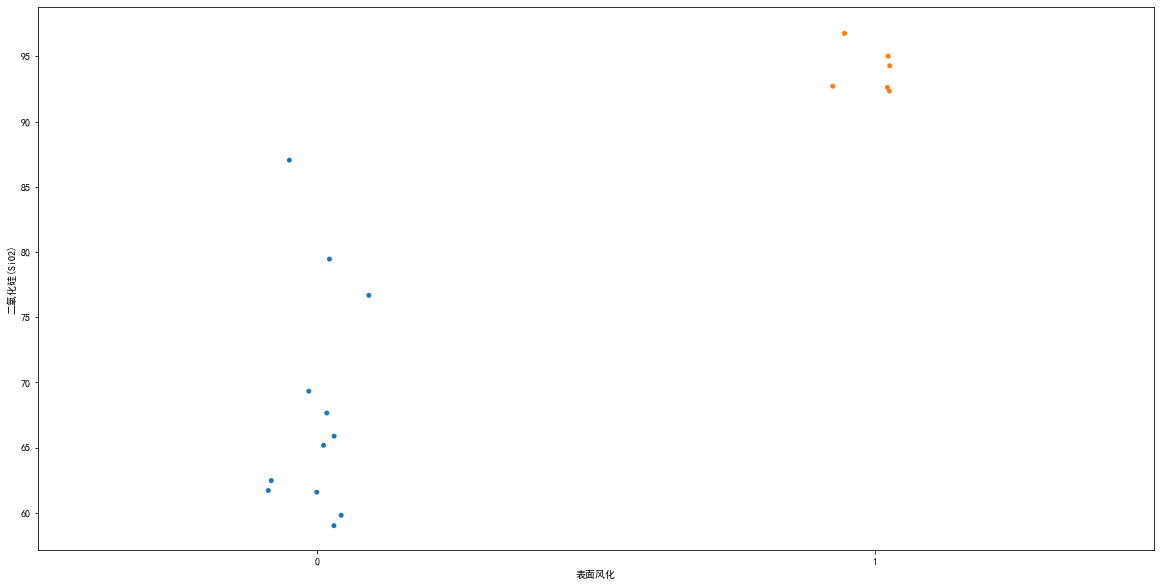

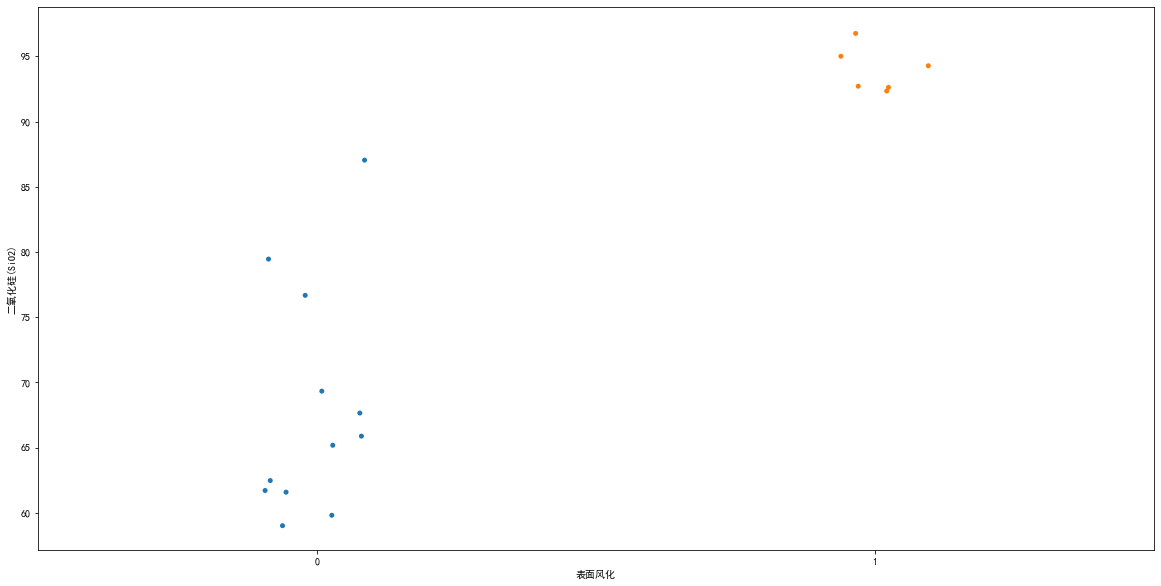

In [148]:
for col in chem_cols:
    plt.figure(figsize=(20, 10))
    sns.stripplot(x= '表面风化',y = '二氧化硅(SiO2)', data=data_2_type0)
    plt.savefig("D:/浏览器/数模/C题/附件/高钾类_{}_风化_striplot.png".format(col))

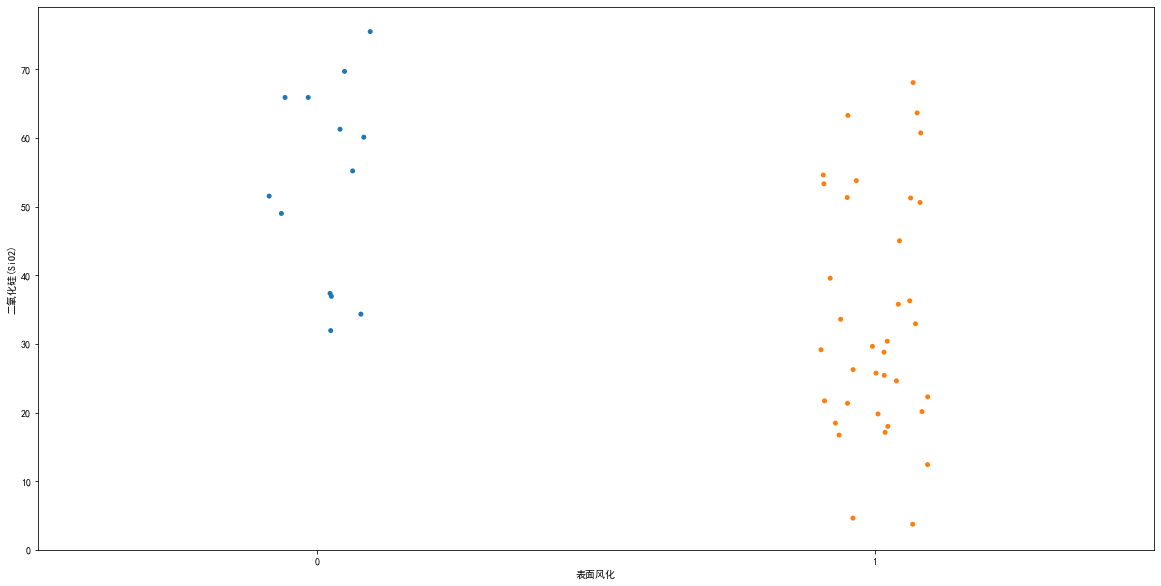

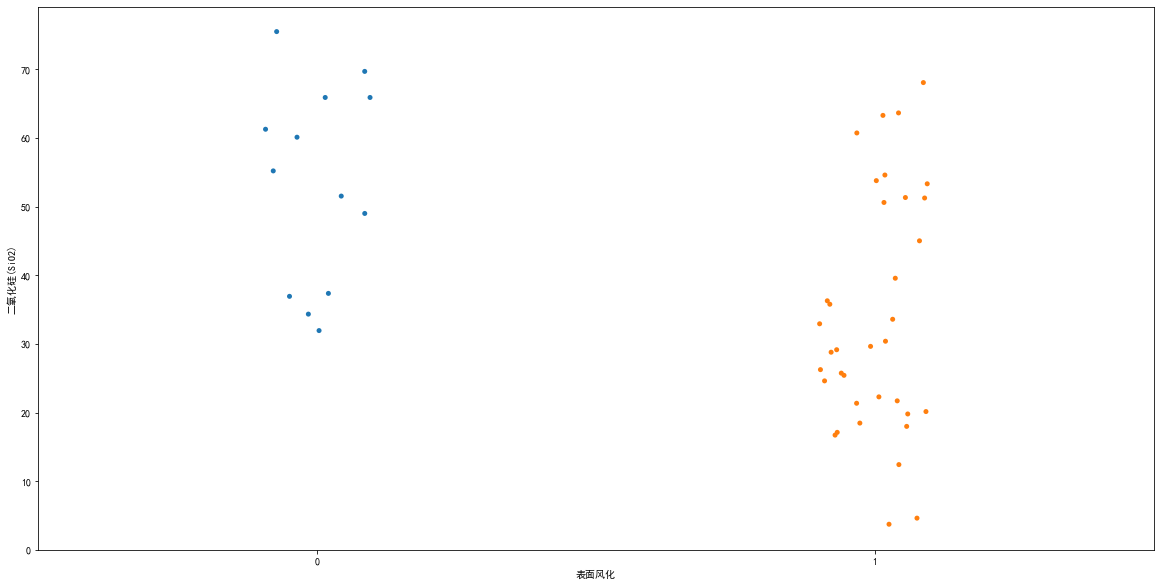

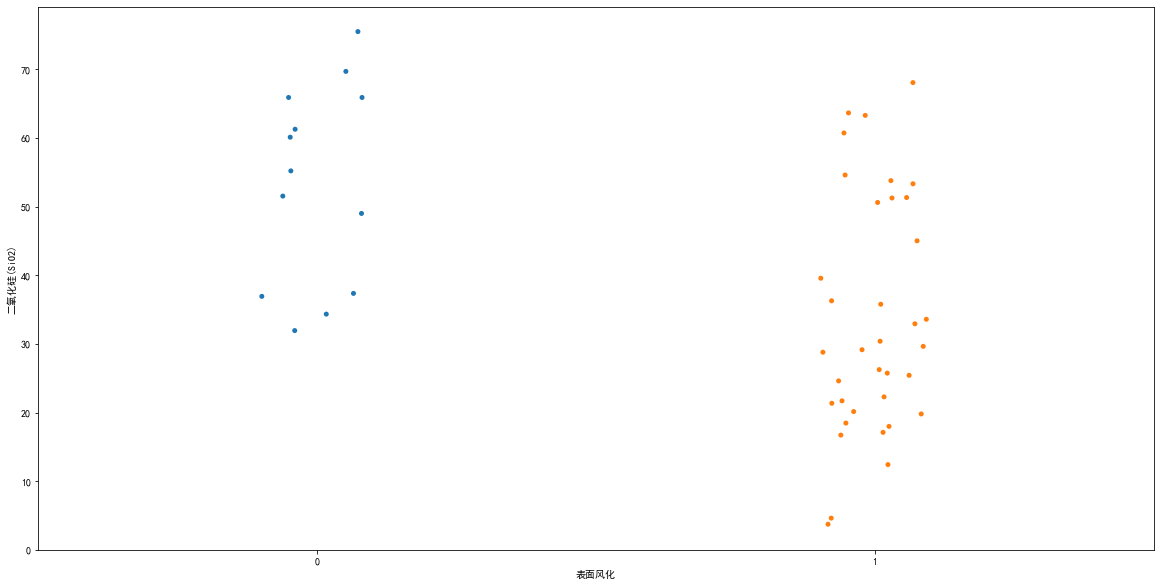

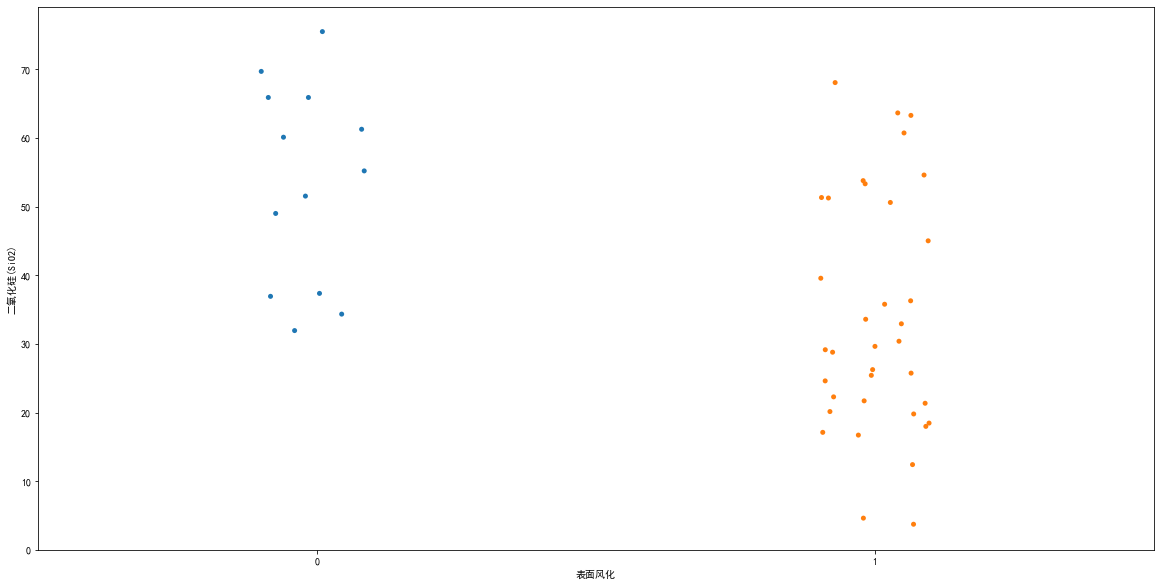

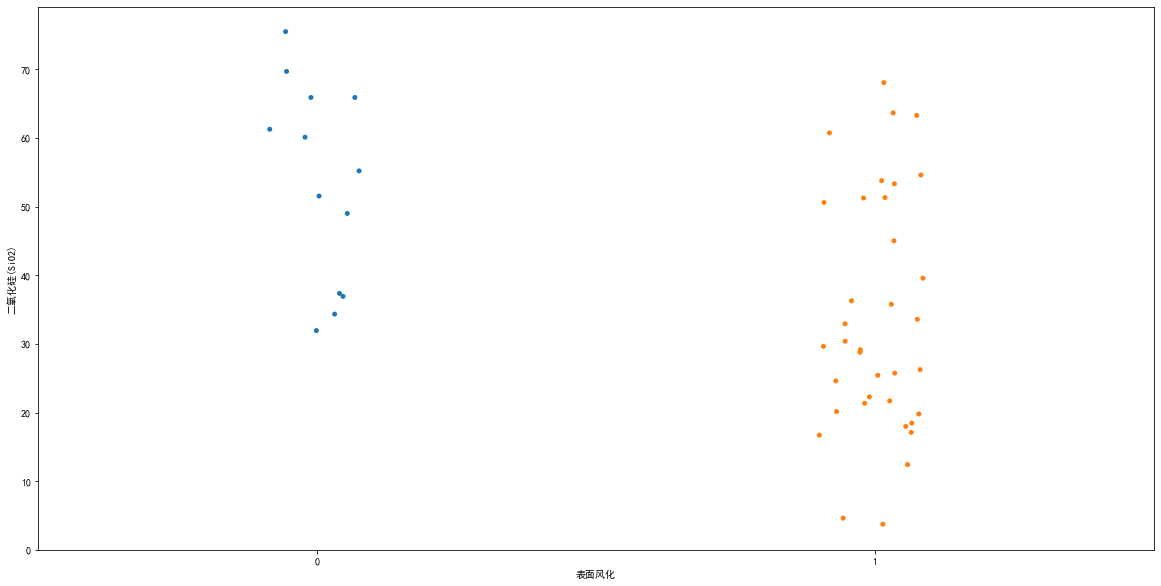

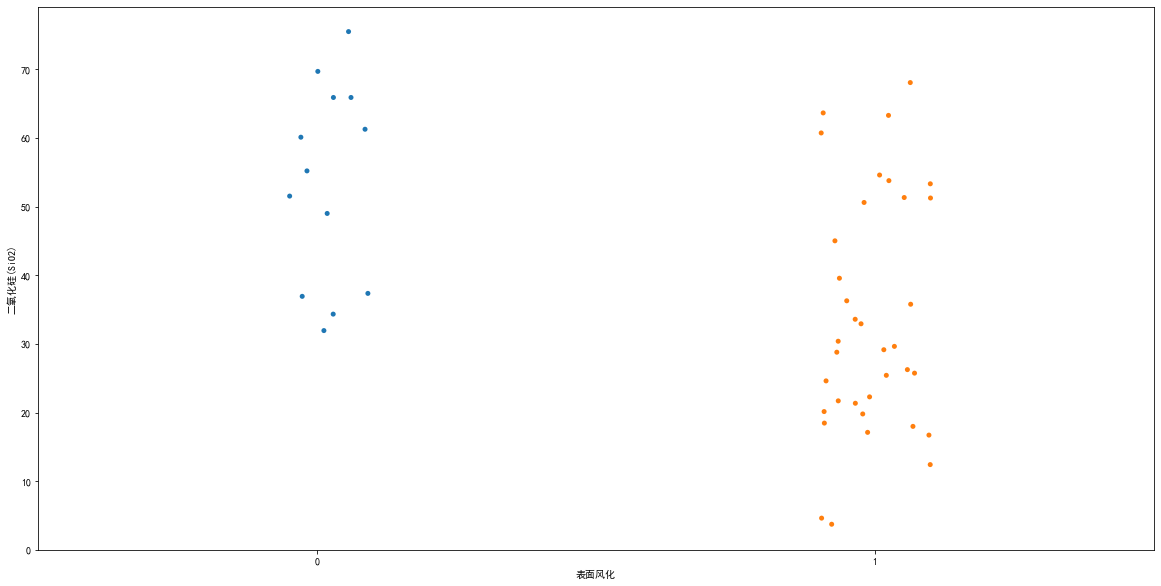

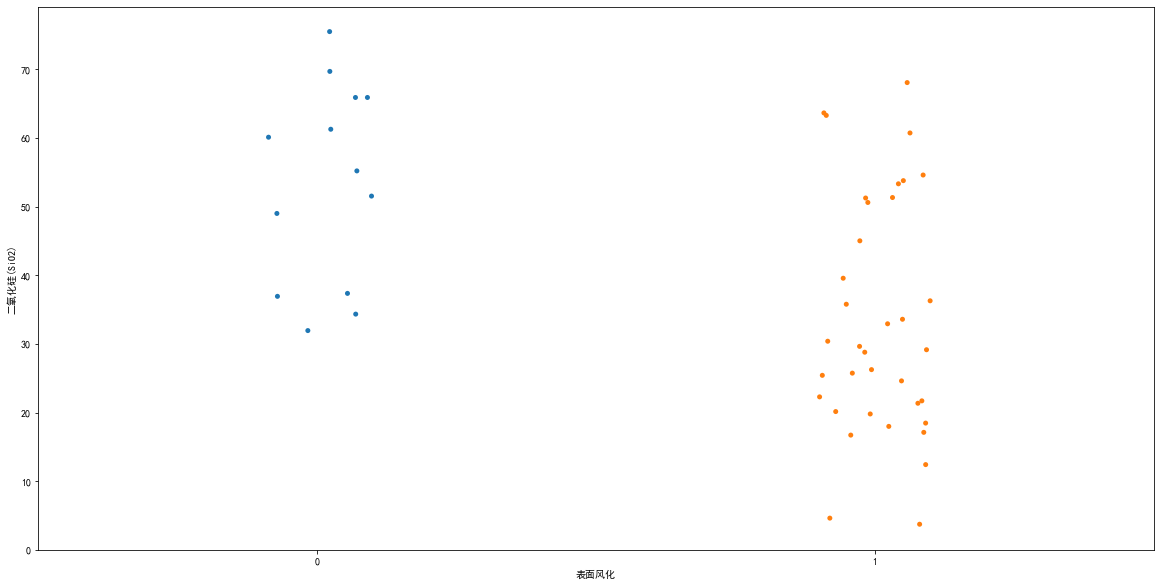

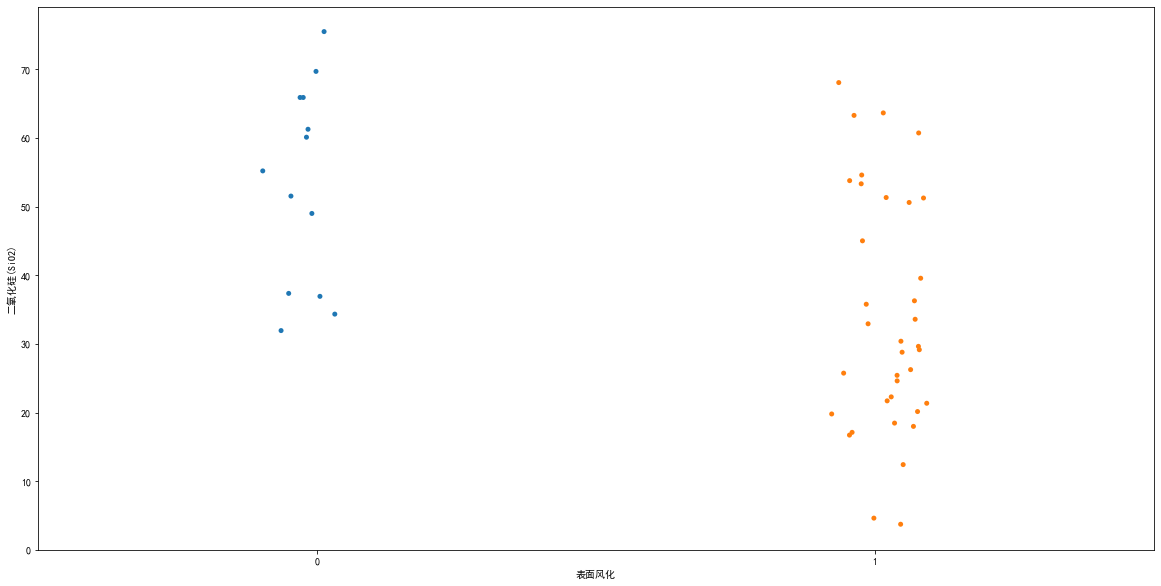

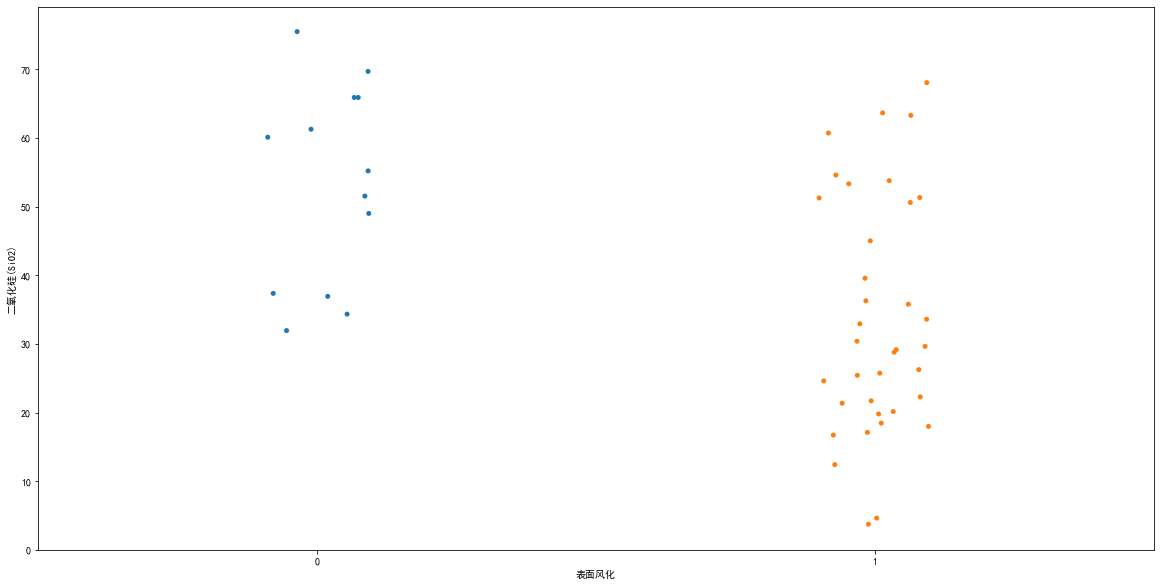

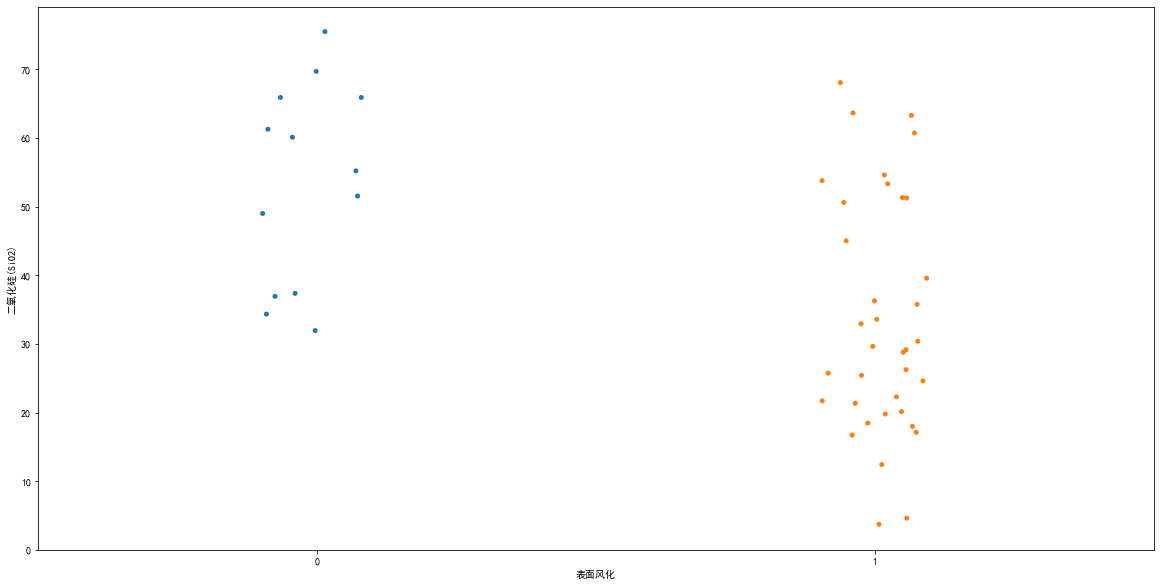

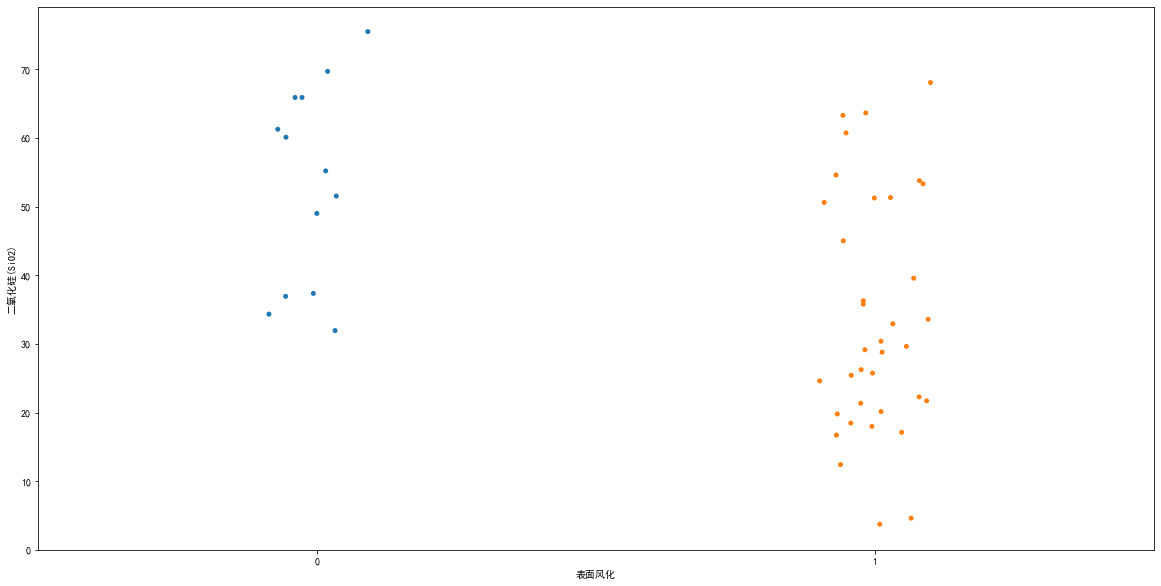

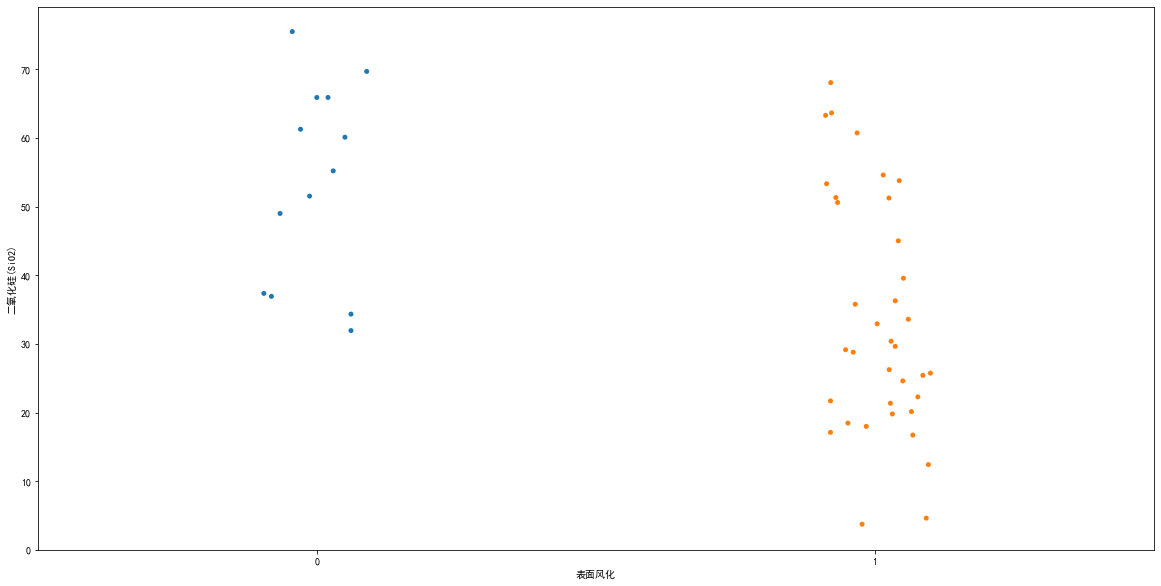

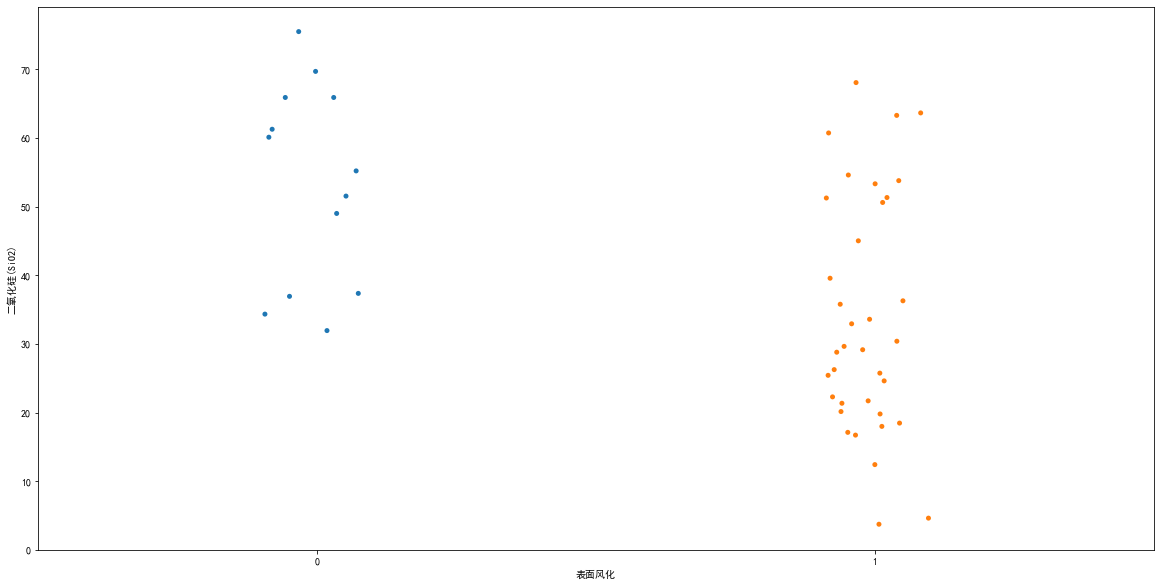

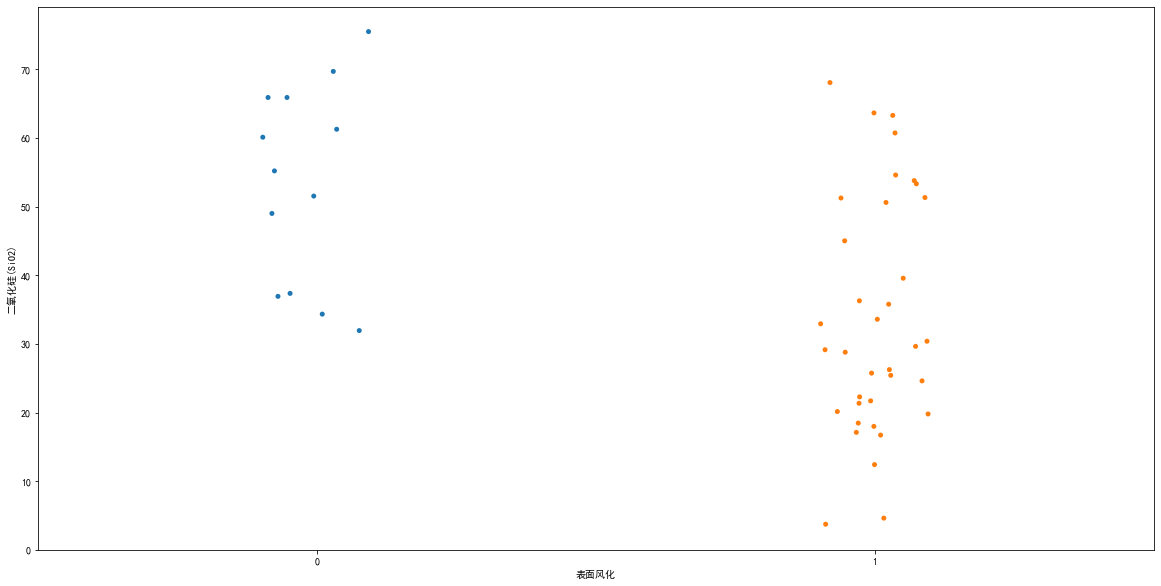

In [103]:
for col in chem_cols:
    plt.figure(figsize=(20, 10))
    sns.stripplot(x= '表面风化',y = '二氧化硅(SiO2)', data=data_2_type1)
    plt.savefig("D:/浏览器/数模/C题/附件/铅钡类_{}_风化_striplot.png".format(col))

In [156]:
data_changed = data_2.iloc[[9, 10, 26, 27, 53, 54, 55, 56], :]

In [163]:
data_changed = data_changed.sort_values(by = ['文物编号','表面风化'])

In [185]:
for col in chem_cols:
    data_changed[col+'_delta'] = data_changed[col]-data_changed.groupby('文物编号').shift(-1)[col]

In [187]:
for col in chem_cols:
    data_changed[col+'_rate'] = data_changed[col+'_delta']/data_changed[col]

In [189]:
rate_cols=[col for col in data_changed.columns if 'rate' in col]

In [195]:
data_changed.loc[[9, 26,54,56],rate_cols]

,二氧化硅(SiO2)_rate,氧化钠(Na2O)_rate,氧化钾(K2O)_rate,氧化钙(CaO)_rate,氧化镁(MgO)_rate,氧化铝(Al2O3)_rate,氧化铁(Fe2O3)_rate,氧化铜(CuO)_rate,氧化铅(PbO)_rate,氧化钡(BaO)_rate,五氧化二磷(P2O5)_rate,氧化锶(SrO)_rate,氧化锡(SnO2)_rate,二氧化硫(SO2)_rate
9,0.771102,NaN,NaN,-1.155405,NaN,0.171642,NaN,0.698367,-0.131450,0.019533,-1.105850,-0.432432,NaN,-4.825581
26,0.812026,NaN,-inf,-1.090278,NaN,-0.685714,NaN,0.659413,-0.013207,-0.099225,-0.929712,-0.377778,NaN,-7.137755
54,0.472807,NaN,1.0,-1.201923,-0.22500,0.172308,-1.15748,-0.555556,-0.484796,-0.455847,-1.569444,-0.533333,NaN,NaN
56,0.600622,NaN,NaN,-0.022436,0.12963,0.550481,-inf,-0.614286,-0.437439,-1.282958,0.000000,-1.869565,NaN,NaN


In [194]:
data_changed

,文物采样点,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2),文物编号,表面风化,类型,二氧化硅(SiO2)_delta,氧化钠(Na2O)_delta,氧化钾(K2O)_delta,氧化钙(CaO)_delta,氧化镁(MgO)_delta,氧化铝(Al2O3)_delta,氧化铁(Fe2O3)_delta,氧化铜(CuO)_delta,氧化铅(PbO)_delta,氧化钡(BaO)_delta,五氧化二磷(P2O5)_delta,氧化锶(SrO)_delta,氧化锡(SnO2)_delta,二氧化硫(SO2)_delta,二氧化硅(SiO2)_rate,氧化钠(Na2O)_rate,氧化钾(K2O)_rate,氧化钙(CaO)_rate,氧化镁(MgO)_rate,氧化铝(Al2O3)_rate,氧化铁(Fe2O3)_rate,氧化铜(CuO)_rate,氧化铅(PbO)_rate,氧化钡(BaO)_rate,五氧化二磷(P2O5)_rate,氧化锶(SrO)_rate,氧化锡(SnO2)_rate,二氧化硫(SO2)_rate
9,08,20.14,0.0,0.0,1.48,0.00,1.34,0.00,10.41,28.68,31.23,3.59,0.37,0.0,2.58,8,1,1,15.53,0.0,0.0,-1.71,0.00,0.23,0.00,7.27,-3.77,0.61,-3.97,-0.16,0.0,-12.45,0.771102,NaN,NaN,-1.155405,NaN,0.171642,NaN,0.698367,-0.131450,0.019533,-1.105850,-0.432432,NaN,-4.825581
10,08严重风化点,4.61,0.0,0.0,3.19,0.00,1.11,0.00,3.14,32.45,30.62,7.56,0.53,0.0,15.03,8,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,26,19.79,0.0,0.0,1.44,0.00,0.70,0.00,10.57,29.53,32.25,3.13,0.45,0.0,1.96,26,1,1,16.07,0.0,-0.4,-1.57,0.00,-0.48,0.00,6.97,-0.39,-3.20,-2.91,-0.17,0.0,-13.99,0.812026,NaN,-inf,-1.090278,NaN,-0.685714,NaN,0.659413,-0.013207,-0.099225,-0.929712,-0.377778,NaN,-7.137755
27,26严重风化点,3.72,0.0,0.4,3.01,0.00,1.18,0.00,3.60,29.92,35.45,6.04,0.62,0.0,15.95,26,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54,49未风化点,54.61,0.0,0.3,2.08,1.20,6.50,1.27,0.45,23.02,4.19,4.32,0.30,0.0,0.00,49,0,1,25.82,0.0,0.3,-2.50,-0.27,1.12,-1.47,-0.25,-11.16,-1.91,-6.78,-0.16,0.0,0.00,0.472807,NaN,1.0,-1.201923,-0.22500,0.172308,-1.15748,-0.555556,-0.484796,-0.455847,-1.569444,-0.533333,NaN,NaN
53,49,28.79,0.0,0.0,4.58,1.47,5.38,2.74,0.70,34.18,6.10,11.10,0.46,0.0,0.00,49,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,50未风化点,45.02,0.0,0.0,3.12,0.54,4.16,0.00,0.70,30.61,6.22,6.34,0.23,0.0,0.00,50,0,1,27.04,0.0,0.0,-0.07,0.07,2.29,-0.33,-0.43,-13.39,-7.98,0.00,-0.43,0.0,0.00,0.600622,NaN,NaN,-0.022436,0.12963,0.550481,-inf,-0.614286,-0.437439,-1.282958,0.000000,-1.869565,NaN,NaN
55,50,17.98,0.0,0.0,3.19,0.47,1.87,0.33,1.13,44.00,14.20,6.34,0.66,0.0,0.00,50,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
from lightgbm import LGBMClassifier
params = {'feature_fraction':0.6,'learning_rate': 0.1, 'n_estimators':100,'early_stop_round':100, 'max_depth': 4, 'l2_leaf_reg': 10, 'bootstrap_type':'Bernoulli','random_seed':2022,
                  'od_type': 'Iter', 'od_wait': 50, 'random_seed': 11, 'allow_writing_files': False}
lgbm = LGBMClassifier(iterations=200, **params, eval_metric='AUC')
lgbm.fit(x_train, y_train, eval_set=(x_var, y_var),
                  verbose=1)

,文物编号,纹饰,类型,颜色,表面风化,纹饰_类型,纹饰_颜色,类型_颜色
0,1,0,0,0,0,0,0,0
1,2,1,1,1,1,1,1,1
2,3,1,0,0,0,2,2,0
3,4,1,0,0,0,2,2,0
4,5,1,0,0,0,2,2,0
5,6,1,0,0,0,2,2,0
6,7,2,0,0,1,3,3,0
7,8,0,1,2,1,4,4,2
8,9,2,0,0,1,3,3,0
9,10,2,0,0,1,3,3,0


In [36]:
data_t2 = data_1

In [37]:
data_t2

,文物编号,纹饰,类型,颜色,表面风化,纹饰_类型,纹饰_颜色,类型_颜色
0,1,0,0,0,0,0,0,0
1,2,1,1,1,1,1,1,1
2,3,1,0,0,0,2,2,0
3,4,1,0,0,0,2,2,0
4,5,1,0,0,0,2,2,0
5,6,1,0,0,0,2,2,0
6,7,2,0,0,1,3,3,0
7,8,0,1,2,1,4,4,2
8,9,2,0,0,1,3,3,0
9,10,2,0,0,1,3,3,0


In [182]:
data_1

,纹饰,类型,颜色,表面风化
0,0,0,0,0
1,1,1,1,1
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
5,1,0,0,0
6,2,0,0,1
7,0,1,2,1
8,2,0,0,1
9,2,0,0,1


In [184]:
data_t = pd.read_csv("t1.csv")
data_t['纹饰_类型']=data_t['纹饰']+'_'+data_t['类型']
data_t['纹饰_颜色']=data_t['纹饰']+'_'+data_t['颜色']
data_t['类型_颜色']=data_t['类型']+'_'+data_t['颜色']
def label_encoder(series):
    ls = list(series.unique())
    length = len(ls)
    cat_dict = dict(zip(ls, range(length)))
    return series.map(cat_dict)
cols = [col for col in data_t.columns if col != '文物编号']
for i in tqdm(cols):
    data_t[i] = label_encoder(data_t[i])
del data_t['文物编号']

100%|██████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 1697.31it/s]


In [185]:
data_t

,纹饰,类型,颜色,表面风化,纹饰_类型,纹饰_颜色,类型_颜色
0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1
2,1,0,0,0,2,2,0
3,1,0,0,0,2,2,0
4,1,0,0,0,2,2,0
5,1,0,0,0,2,2,0
6,2,0,0,1,3,3,0
7,0,1,2,1,4,4,2
8,2,0,0,1,3,3,0
9,2,0,0,1,3,3,0


In [187]:

from sklearn.cluster import KMeans

In [192]:

# StandardScaler().fit_transform??

Object `fit_transform` not found.


In [ ]:
StandardScaler().fit_transform()

In [199]:
# 归一化函数
def Normalization(x):
    return [(float(i)-min(x))/float(max(x)-min(x)) for i in x]

In [196]:
# 标准化函数
def z_score(x, axis):
    x = np.array(x).astype(float)
    xr = np.rollaxis(x, axis=axis)
    xr -= np.mean(x, axis=axis)
    xr /= np.std(x, axis=axis)
    # print(x)
    return x

In [203]:
for col in cols:
    data_t[col] = z_score(data_t[col],0)
    
#     data_t[col] = Normalization2(data_t[col])

In [204]:
data_t

,纹饰,类型,颜色,表面风化,纹饰_类型,纹饰_颜色,类型_颜色
0,-0.874386,-1.490712,-0.943763,-1.190238,-1.633155,-1.514887,-0.977124
1,0.617213,0.670820,-0.475915,0.840168,-0.966092,-1.166223,-0.718342
2,0.617213,-1.490712,-0.943763,-1.190238,-0.299028,-0.817558,-0.977124
3,0.617213,-1.490712,-0.943763,-1.190238,-0.299028,-0.817558,-0.977124
4,0.617213,-1.490712,-0.943763,-1.190238,-0.299028,-0.817558,-0.977124
5,0.617213,-1.490712,-0.943763,-1.190238,-0.299028,-0.817558,-0.977124
6,2.108812,-1.490712,-0.943763,0.840168,0.368035,-0.468894,-0.977124
7,-0.874386,0.670820,-0.008066,0.840168,1.035098,-0.120229,-0.459560
8,2.108812,-1.490712,-0.943763,0.840168,0.368035,-0.468894,-0.977124
9,2.108812,-1.490712,-0.943763,0.840168,0.368035,-0.468894,-0.977124


In [214]:
def KMean_graph():  # KMeans聚类
#     pd_down_data = pd.read_csv("data.csv")
    down_data = np.array(data_t)
    SSE = []
    left = 2
    right = 16
    for k in range(left, right):
        km = KMeans(n_clusters=k)
        km.fit(down_data)
        SSE.append(km.inertia_)

    # 肘部法取k值
    xx = range(left, right)
    plt.xlabel("k")
    plt.ylabel("SSE")
    plt.plot(xx, SSE, "o-")
    plt.savefig("SSE.png")
    plt.show()

    D_data = data_t
    weidu = 2
    km = KMeans(n_clusters=5).fit(down_data)  # 确定完取几类之后开始计算

    print("质心")
    center = km.cluster_centers_
    print(center)
    D_data["cluster"] = km.labels_  # 给数据打上聚类标签
    print(D_data)

    plt.rcParams["font.size"] = 14
    colors = np.array(["red", "gray", "orange", "pink", "blue", "black"])
    new_col = []  # 更换列名，但是由于我用的tsne降维出来的，就懒得取名字了
    for i in range(weidu):
        new_col.append(str(i))
    new_col.append("cluster")
#     D_data.columns = new_col

    ele_x = "0"  # Dataframe第一列的列名
    ele_y = "1"  # 第二列列名
    xx = np.array(D_data[ele_x])
    yy = np.array(D_data[ele_y])
    cc = np.array(D_data["cluster"])
    
    plt.scatter(xx, yy, c=colors[cc])  # 不同的类用上不同的颜色
    plt.scatter(center[:, 0], center[:, 1], marker="o", s=15, c="black")  # 聚类中心
    plt.xlabel(ele_x)
    plt.ylabel(ele_y)
    plt.savefig("K-means.png")
    plt.show()


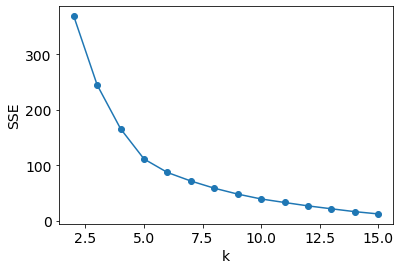

质心
[[-4.35680047e-01  6.70820393e-01  1.31291749e+00  1.23554125e-01
   4.46513009e-01  1.21289980e+00  1.35191090e+00  3.00000000e+00]
 [-8.74385650e-01  6.70820393e-01 -3.97940055e-01  5.01767030e-01
   1.03509834e+00 -1.78339883e-01 -3.73299930e-01  1.00000000e+00]
 [-1.28586125e-01 -1.49071198e+00 -5.14902165e-01 -1.19023807e+00
  -9.66091783e-01 -2.65506006e-01 -5.24255878e-01 -4.44089210e-16]
 [ 6.17213400e-01  6.70820393e-01 -5.18446472e-01  1.01838552e-01
  -9.66091783e-01 -1.13452583e+00 -5.77188483e-01  4.00000000e+00]
 [ 2.10881245e+00 -1.49071198e+00 -9.43763238e-01  8.40168050e-01
   3.68034965e-01 -4.68893625e-01 -9.77123722e-01  2.00000000e+00]]
          纹饰        类型        颜色      表面风化     纹饰_类型     纹饰_颜色     类型_颜色  \
0  -0.874386 -1.490712 -0.943763 -1.190238 -1.633155 -1.514887 -0.977124   
1   0.617213  0.670820 -0.475915  0.840168 -0.966092 -1.166223 -0.718342   
2   0.617213 -1.490712 -0.943763 -1.190238 -0.299028 -0.817558 -0.977124   
3   0.617213 -1.490712 -0.9

KeyError: '0'

In [215]:
KMean_graph()